<a href="https://colab.research.google.com/github/rajkgurindapalli/rajkgurindapalli/blob/main/Raj_HealthExpenses_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [31]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()
# dataset.head()

--2021-08-17 01:36:58--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.3’

insurance.csv.3     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2021-08-17 01:36:58 (4.53 MB/s) - ‘insurance.csv.3’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [32]:
len(dataset)
# dataset.head()

1338

In [33]:
df = dataset
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
dataset = df
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [34]:
test_dataset = dataset.sample(frac=0.2)
len(test_dataset)

268

In [35]:
# Now, we select the remaining 80% to make train_dataset
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()
len(train_dataset)

1070

In [36]:
train_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0.0,27.9,0.0,0.0,0.0,16884.92
1,18.0,1.0,33.8,1.0,1.0,1.0,1725.55
2,28.0,1.0,33.0,3.0,1.0,1.0,4449.46
3,33.0,1.0,22.7,0.0,1.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,1.0,2.0,3866.86


In [37]:
train_labels = train_dataset.pop("expenses")
train_labels.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [38]:
train_dataset.head()

,age,sex,bmi,children,smoker,region
0,19.0,0.0,27.9,0.0,0.0,0.0
1,18.0,1.0,33.8,1.0,1.0,1.0
2,28.0,1.0,33.0,3.0,1.0,1.0
3,33.0,1.0,22.7,0.0,1.0,2.0
4,32.0,1.0,28.9,0.0,1.0,2.0


In [39]:
test_labels = test_dataset.pop("expenses")
test_labels.head()

832      4719.74
1225     4795.66
859     10965.45
1253    15828.82
831      5266.37
Name: expenses, dtype: float64

In [40]:
test_dataset.head()

,age,sex,bmi,children,smoker,region
832,28,0,23.8,2,1,2
1225,33,0,39.8,1,1,1
859,57,1,28.1,0,1,0
1253,40,0,29.3,4,1,0
831,36,0,25.8,0,1,2


In [41]:
# Prepare the model
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])

In [44]:
# Complie model
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 6)                 13        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                112       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 68        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 198
Trainable params: 185
Non-trainable params: 13
_________________________________________________________________


In [45]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.5,
    verbose=0, # disable logging
)

print(history)

9/9 - 0s - loss: 3321.1316 - mae: 3321.1316 - mse: 35509860.0000
Testing set Mean Abs Error: 3321.13 expenses
You passed the challenge. Great job!


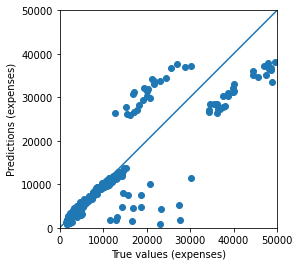

In [46]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)